In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, RFE
from xgboost import XGBClassifier

In [143]:
train=pd.read_csv('train.csv')


In [144]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [145]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [146]:
from sklearn.preprocessing import Imputer

In [147]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [148]:
data['Embarked'].fillna('S')
#Removing null values

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [149]:
data=train.drop(['Name','Ticket','Cabin'], axis=1)

In [150]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [151]:
data2=pd.get_dummies(data)
#One hot encoding

In [152]:
data2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
5,6,0,3,NaN,0,0,8.4583,0,1,0,1,0
6,7,0,1,54.0,0,0,51.8625,0,1,0,0,1
7,8,0,3,2.0,3,1,21.0750,0,1,0,0,1
8,9,1,3,27.0,0,2,11.1333,1,0,0,0,1
9,10,1,2,14.0,1,0,30.0708,1,0,1,0,0


In [153]:
data2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [154]:
from sklearn.preprocessing import Imputer

In [155]:
imr=Imputer(missing_values='NaN',strategy='median')
#imputing the null values

In [156]:
data2['Age']=imr.fit_transform(data2[['Age']]).ravel()

In [157]:
#MinMax Scaler
minmax_scaler=preprocessing.MinMaxScaler()
m= data2.iloc[:,3:4].values
n= data2.iloc[:,6:7].values
age_nml=minmax_scaler.fit_transform(m)
fare_nml=minmax_scaler.fit_transform(n)


In [158]:
#standard Scaler to transform data
scaler=preprocessing.StandardScaler()
m= data2.iloc[:,3:4].values
n= data2.iloc[:,6:7].values
age_ss=minmax_scaler.fit_transform(m)
fare_ss=minmax_scaler.fit_transform(n)

In [159]:
data2['Age']=age_ss
data2['Fare']=fare_ss

In [160]:
data2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0.271174,1,0,0.014151,0,1,0,0,1
1,2,1,1,0.472229,1,0,0.139136,1,0,1,0,0
2,3,1,3,0.321438,0,0,0.015469,1,0,0,0,1
3,4,1,1,0.434531,1,0,0.103644,1,0,0,0,1
4,5,0,3,0.434531,0,0,0.015713,0,1,0,0,1
5,6,0,3,0.346569,0,0,0.016510,0,1,0,1,0
6,7,0,1,0.673285,0,0,0.101229,0,1,0,0,1
7,8,0,3,0.019854,3,1,0.041136,0,1,0,0,1
8,9,1,3,0.334004,0,2,0.021731,1,0,0,0,1
9,10,1,2,0.170646,1,0,0.058694,1,0,1,0,0


In [161]:
X= data2.loc[:, data2.columns!='Survived']
Y= data2.loc[:, data2.columns=='Survived']


In [162]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=8)

In [163]:
lr= LogisticRegression()
model= lr.fit(x_train,y_train)
predictions= lr.predict(x_test)
score=lr.score(x_test,y_test)

F:\New folder\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [164]:
score

0.8067796610169492

In [165]:
data_corr= data2.corr()

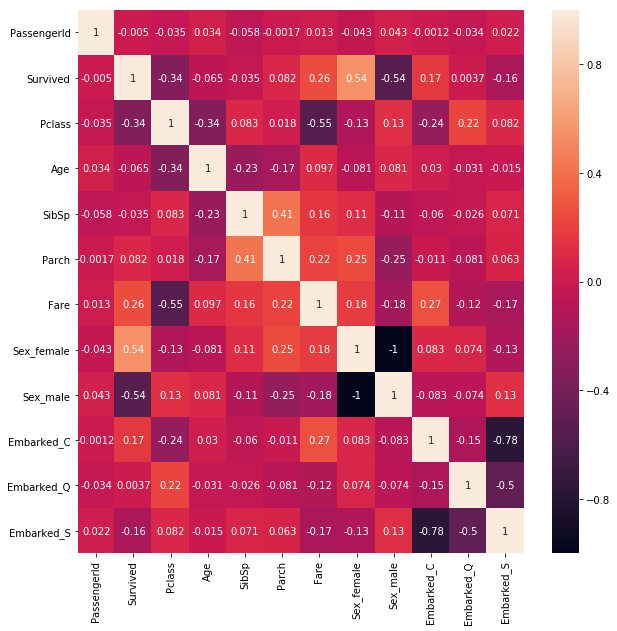

In [166]:
plt.figure(figsize=(10,10))
sns.heatmap(data_corr, annot=True)

In [167]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import GridSearchCV
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
X = data2[['Sex_male', 'Age', 'SibSp', 'Parch','Fare', 'Pclass', 'Embarked_C', 'Embarked_Q']]
y = data2['Survived']  #target column i.e price range

best_model = clf.fit(X, y)

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [168]:
y_predict = best_model.predict(X)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
accuracy

0.8024691358024691

# Univariate Feature Extraction

In [185]:
select_feature=SelectKBest(chi2,k=3).fit(x_train,y_train)

In [186]:
selected_features_data2=pd.DataFrame({'Feature':list(x_train.columns),
                               'Score':select_feature.scores_})

In [187]:
selected_features_data2.sort_values(ascending=False, by='Score')

,Feature,Score
6,Sex_female,114.830706
7,Sex_male,62.014516
1,Pclass,21.733144
0,PassengerId,16.634786
8,Embarked_C,15.191863
5,Fare,6.512796
10,Embarked_S,4.732588
4,Parch,3.694375
3,SibSp,2.254248
2,Age,0.108845


In [188]:
x_train_chi=select_feature.transform(x_train)
x_test_chi=select_feature.transform(x_test)

In [191]:
lr_chi_model=lr.fit(x_train_chi, y_train)
prediction= lr.predict(x_test_chi)
score=lr.score(x_test_chi, y_test)

F:\New folder\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [192]:
score

0.7830508474576271

# RFE

In [194]:
rfe=RFE(estimator=lr, step=1)
rfe= rfe.fit(x_train, y_train)

F:\New folder\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [197]:
selected_features_rfe=pd.DataFrame({'Feature':list(x_train.columns),
                                   'Ranking':rfe.ranking_})
selected_features_rfe.sort_values(ascending=False,by='Ranking')

,Feature,Ranking
0,PassengerId,7
4,Parch,6
10,Embarked_S,5
9,Embarked_Q,4
3,SibSp,3
5,Fare,2
1,Pclass,1
2,Age,1
6,Sex_female,1
7,Sex_male,1


In [198]:
x_train_rfe=rfe.transform(x_train)
x_test_rfe=rfe.transform(x_test)

In [199]:
lr_rfe_model=lr.fit(x_train_rfe,y_train)
prediction=lr.predict(x_test_rfe)
score=lr.score(x_test_rfe,y_test)

F:\New folder\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# XGBoost

In [214]:
data_xgb= data2.drop(['Sex_female','Embarked_S'],axis=1)

In [216]:
X1= data_xgb.loc[:, data_xgb.columns!='Survived']
Y1= data_xgb.loc[:, data_xgb.columns=='Survived']

In [217]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X1, Y1, 
                                                    test_size=0.33, 
                                                    random_state=8)

In [218]:
model_xgb= XGBClassifier()
model_xgb.fit(x1_train,y1_train)

F:\New folder\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\New folder\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [219]:
predictions=model_xgb.predict(x1_test)
score=model_xgb.score(x1_test,y1_test)

In [220]:
score

0.8271186440677966